In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

accidentes = pd.read_csv("traffic_accidents_clean.csv",index_col="num_expediente")
accidentes

,fecha,hora_24h,fecha_hora,distrito,tipo_accidente,condiciones_meteorológicas,tipo_vehiculo,tipo_persona,rango_edad,sexo,lesividad,alcohol_test,drogas_test,coordenada_x_utm,coordenada_y_utm
num_expediente,,,,,,,,,,,,,,,
2018S017842,2019-02-04,09:10,2019-02-04 09:10:00,Centro,Colisión lateral,Despejado,Motocicleta > 125cc,Conductor,45 - 49,Hombre,Asistencia sanitaria sólo en el lugar del acci...,No,No,4.400680e+05,4.475679e+06
2018S017842,2019-02-04,09:10,2019-02-04 09:10:00,Centro,Colisión lateral,Despejado,Turismo,Conductor,30 - 34,Mujer,Asistencia sanitaria sólo en el lugar del acci...,No,No,4.400680e+05,4.475679e+06
2019S000001,2019-01-01,03:45,2019-01-01 03:45:00,Carabanchel,Alcance,No registrado,Furgoneta,Conductor,40 - 44,Hombre,Se desconoce,Si,No,4.391396e+05,4.470837e+06
2019S000001,2019-01-01,03:45,2019-01-01 03:45:00,Carabanchel,Alcance,No registrado,Turismo,Conductor,40 - 44,Mujer,Se desconoce,No,No,4.391396e+05,4.470837e+06
2019S000001,2019-01-01,03:45,2019-01-01 03:45:00,Carabanchel,Alcance,No registrado,Turismo,Conductor,45 - 49,Mujer,Se desconoce,No,No,4.391396e+05,4.470837e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023S040267,2023-12-31,21:15,2023-12-31 21:15:00,Villaverde,Colisión fronto-lateral,Despejado,Turismo,Pasajero,45 - 49,Mujer,Asistencia sanitaria sólo en el lugar del acci...,No,No,4.411526e+08,4.466350e+09
2023S040267,2023-12-31,21:15,2023-12-31 21:15:00,Villaverde,Colisión fronto-lateral,Despejado,Turismo,Pasajero,6 - 9,Hombre,Asistencia sanitaria sólo en el lugar del acci...,No,No,4.411526e+08,4.466350e+09
2023S040277,2023-12-29,09:35,2023-12-29 09:35:00,Centro,Alcance,Despejado,Motocicleta hasta 125cc,Conductor,45 - 49,Hombre,Se desconoce,No,No,4.395949e+08,4.473164e+09


In [7]:


accidentes.isna().sum()

# Convertir columna fecha de string a datetime
accidentes['fecha'] = pd.to_datetime(accidentes["fecha"])

# Datos faltantes sustituir por la moda

accidentes['rango_edad'] = accidentes['rango_edad'].replace("Desconocido", np.nan)
moda_rango_edad= accidentes["rango_edad"].mode()[0]
accidentes["rango_edad"] = accidentes["rango_edad"].fillna(moda_rango_edad)

accidentes["sexo"] = accidentes["sexo"].replace("Desconocido", np.nan)
moda_sexo = accidentes["sexo"].mode()[0]
accidentes["sexo"] = accidentes["sexo"].fillna(moda_sexo)

accidentes["lesividad"] = accidentes["lesividad"].replace("Se desconoce", np.nan)
moda_lesividad = accidentes["lesividad"].mode()[0]

accidentes["lesividad"] = accidentes["lesividad"].fillna(moda_lesividad)

# Datos faltantes tipo float

media_coordenadaX = accidentes["coordenada_x_utm"].mean()
accidentes["coordenada_x_utm"] = accidentes["coordenada_x_utm"].fillna(media_coordenadaX)
media_coordenadaY = accidentes["coordenada_y_utm"].mean()
accidentes["coordenada_y_utm"] = accidentes["coordenada_y_utm"].fillna(media_coordenadaY)

# Datos no registrados en condiciones meteorologicas

accidentes["condiciones_meteorológicas"] =accidentes["condiciones_meteorológicas"].replace("No registrado",np.nan)
moda_condiciones_meteorologicas = accidentes["condiciones_meteorológicas"].mode()[0]

accidentes[ "condiciones_meteorológicas"] = accidentes[ "condiciones_meteorológicas"].fillna(moda_condiciones_meteorologicas)

# Duplicados

accidentes.duplicated().sum()
accidentes = accidentes.drop_duplicates()


C:\Users\Usuario\AppData\Local\Temp\ipykernel_4392\1393582870.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accidentes['fecha'] = pd.to_datetime(accidentes["fecha"])
C:\Users\Usuario\AppData\Local\Temp\ipykernel_4392\1393582870.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accidentes['rango_edad'] = accidentes['rango_edad'].replace("Desconocido", np.nan)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_4392\1393582870.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

In [6]:
# Muertes por año

accidentes["año"] = accidentes["fecha"].dt.year
asistencia_sanitaria = accidentes["lesividad"].unique()
accidentes["muertes"] = accidentes["lesividad"] == "Fallecido 24 horas"
muerte_anual = accidentes.groupby("año")[["muertes"]].sum().reset_index()


total_muertes = accidentes["muertes"].sum()

muerte_anual

C:\Users\Usuario\AppData\Local\Temp\ipykernel_4392\2555574272.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accidentes["año"] = accidentes["fecha"].dt.year
C:\Users\Usuario\AppData\Local\Temp\ipykernel_4392\2555574272.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accidentes["muertes"] = accidentes["lesividad"] == "Fallecido 24 horas"


,año,muertes
0,2019,34
1,2020,34
2,2021,28
3,2022,22
4,2023,26


In [ ]:
# Muertes por hora

# Función para asignar franjas horarias según la hora
def franja_horaria(hora):
    if 0 <= hora < 7:
        return "Madrugada"   
    elif 7 <= hora < 12:
        return "Mañana"      
    elif 12 <= hora < 19:
        return "Tarde"       
    else:
        return "Noche"       
    

# Extraer la hora en formato entero desde la columna 'hora_24h'
accidentes['hora_int'] = accidentes.loc[:, 'hora_24h'].str.split(':').str[0].astype(int)

# Crear nueva columna 'franja_horaria' aplicando la función a la columna de horas enteras
accidentes['franja_horaria'] = accidentes.loc[:, 'hora_int'].apply(franja_horaria)

# Agrupar las muertes por año y franja horaria, sumando la cantidad de muertes para cada grupo
muertes_por_año_franja_horaria = accidentes.groupby(['año', 'franja_horaria'])['muertes'].sum().reset_index()

# Agrupar muertes por año y hora exacta, sumando las muertes por cada hora de cada año
muertes_por_año_hora = accidentes.groupby(['año', 'hora_int'])['muertes'].sum().reset_index()

años = [2019, 2020, 2021, 2022, 2023]

# Bucle que itera por cada año, filtra las filas de ese año y encuentra la hora con más muertes
for año in años:
    df_filtrado = muertes_por_año_hora[muertes_por_año_hora['año'] == año]  
    idx_max = df_filtrado['muertes'].idxmax()                              
    fila_max = df_filtrado.loc[idx_max]                                    
    print(f"Año {año}: Hora punta = {fila_max['hora_int']}, Muertes = {fila_max['muertes']}")



# Opcional: definir un orden lógico para la columna 'franja_horaria'
# Esto ayuda a mantener el orden correcto (Madrugada, Mañana, Tarde, Noche) en tablas o gráficos
muertes_por_año_franja_horaria["franja_horaria"] = pd.Categorical(
    muertes_por_año_franja_horaria["franja_horaria"],
    categories=["Madrugada", "Mañana", "Tarde", "Noche"],
    ordered=True
)

# Calcular el total de muertes por cada año para usar en el cálculo de porcentaje
# 'transform' mantiene el mismo tamaño del DataFrame pero con el total por grupo (año)
total_muertes_por_año = muertes_por_año_franja_horaria.groupby('año')['muertes'].transform('sum')

# Crear nueva columna con el porcentaje de muertes de cada franja horaria respecto al total de muertes de ese año
muertes_por_año_franja_horaria['%muertes_hora_anual'] = (muertes_por_año_franja_horaria['muertes'] / total_muertes_por_año) * 100

# Encontrar el índice de la franja horaria con mayor porcentaje de muertes por cada año
idx_max = muertes_por_año_franja_horaria.groupby('año')['%muertes_hora_anual'].idxmax()

# Obtener las filas correspondientes a esas franjas horarias para cada año
franja_horaria_mas_muertes = muertes_por_año_franja_horaria.loc[idx_max].reset_index(drop=True)

# Mostrar la tabla con la franja horaria que más muertes tuvo por cada año
franja_horaria_mas_muertes



Año 2019: Hora punta = 20, Muertes = 5
Año 2020: Hora punta = 14, Muertes = 4
Año 2021: Hora punta = 12, Muertes = 3
Año 2022: Hora punta = 18, Muertes = 4
Año 2023: Hora punta = 19, Muertes = 5


,año,franja_horaria,muertes,%muertes_hora_anual
0,2019,Noche,14,41.176471
1,2020,Noche,10,29.411765
2,2021,Tarde,10,35.714286
3,2022,Tarde,9,40.909091
4,2023,Mañana,8,30.769231


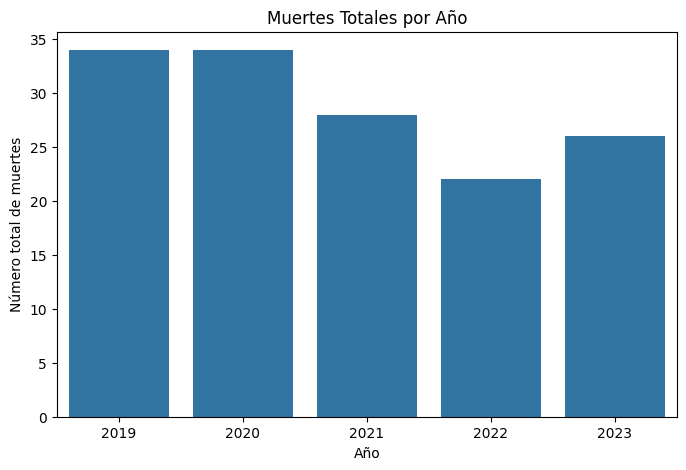

In [50]:
# . Gráfico: Muertes totales por año (barras)

plt.figure(figsize=(8,5))

# Agrupar muertes totales por año
muertes_totales_por_año = accidentes.groupby('año')['muertes'].sum().reset_index()

sns.barplot(data=muertes_totales_por_año, x='año', y='muertes')

plt.title('Muertes Totales por Año')
plt.xlabel('Año')
plt.ylabel('Número total de muertes')
plt.show()


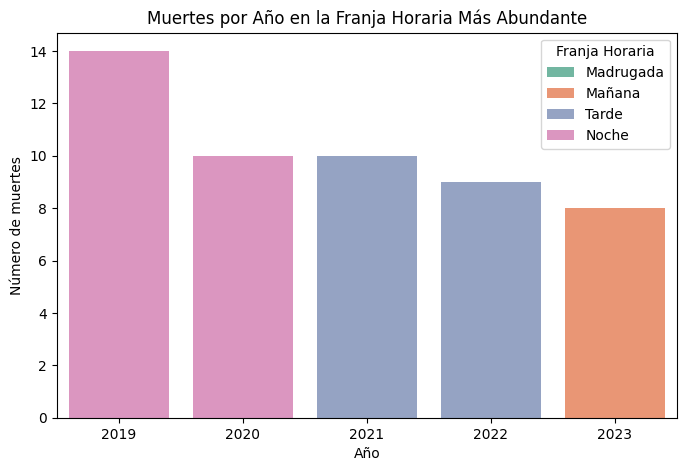

In [51]:
#  Gráfico: Muertes de la franja horaria más abundante por año (barras)

plt.figure(figsize=(8,5))

sns.barplot(data=franja_horaria_mas_muertes, x='año', y='muertes', hue='franja_horaria', palette='Set2')

plt.title('Muertes por Año en la Franja Horaria Más Abundante')
plt.xlabel('Año')
plt.ylabel('Número de muertes')
plt.legend(title='Franja Horaria')
plt.show()

In [69]:
#  Año + Clima

# Calcula el % de muertes en cada tipo de clima dentro de cada año.

muertes_anual_clima = accidentes.groupby(['año', 'condiciones_meteorológicas'])['muertes'].sum().reset_index()
total_muertes_por_año = muertes_anual_clima.groupby('año')['muertes'].transform('sum') 
muertes_anual_clima["%tasa_mortalidad"] = (muertes_anual_clima['muertes'] / total_muertes_por_año) * 100
idx_max = muertes_anual_clima.groupby('año')["%tasa_mortalidad"].idxmax()
climas_mas_muertes = muertes_anual_clima.loc[idx_max].reset_index(drop=True)


# Clima es más letal en proporción a los accidentes que ocurren bajo esa condición climatológica por cada 100 habitantes

total_accidentes_clima = accidentes.loc[:,'condiciones_meteorológicas'].value_counts()
muertes_por_clima_total = accidentes.groupby('condiciones_meteorológicas')['muertes'].sum()
tasa_mortalidad_clima = (muertes_por_clima_total / total_accidentes_clima) * 100


In [72]:
# Año + Tipo de vehículo

# % de muertes por tipo de vehículo dentro de cada año
muertes_anual_vehiculo = accidentes.groupby(['año', 'tipo_vehiculo'])['muertes'].sum().reset_index()
total_muertes_por_año_veh = muertes_anual_vehiculo.groupby('año')['muertes'].transform('sum')
muertes_anual_vehiculo["%tasa_mortalidad"] = (muertes_anual_vehiculo['muertes'] / total_muertes_por_año_veh) * 100

# Vehículo con mayor % muertes por año
idx_max_veh = muertes_anual_vehiculo.groupby('año')["%tasa_mortalidad"].idxmax()
vehiculos_mas_muertes = muertes_anual_vehiculo.loc[idx_max_veh].reset_index(drop=True)

# Tasa mortalidad total por vehículo (muertes / total accidentes de ese vehículo) por cada 100 habitantes
total_accidentes_vehiculo = accidentes.loc[:,'tipo_vehiculo'].value_counts()
muertes_por_vehiculo_total = accidentes.groupby('tipo_vehiculo')['muertes'].sum()
tasa_mortalidad_vehiculo = (muertes_por_vehiculo_total / total_accidentes_vehiculo) * 100

# Filtrar vehículos con muertes > 0 en el DataFrame anual
muertes_anual_vehiculo = muertes_anual_vehiculo[muertes_anual_vehiculo['muertes'] > 0].reset_index(drop=True)

# Filtrar vehículos con muertes > 0 en la tasa de mortalidad total
vehiculos_con_muertes = tasa_mortalidad_vehiculo[tasa_mortalidad_vehiculo > 0]
vehiculos_con_muertes

tipo_vehiculo
Autobús                      0.126081
Bicicleta                    0.132170
Camión rígido                0.039216
Ciclomotor                   0.094458
Furgoneta                    0.035443
Motocicleta > 125cc          0.364496
Motocicleta hasta 125cc      0.187409
Otros vehículos con motor    0.238379
Todo terreno                 0.063012
Turismo                      0.036573
VMU eléctrico                0.042608
dtype: float64

In [73]:
#  Año + Tipo de accidente

# % de muertes por tipo de accidente dentro de cada año
muertes_anual_accidente = accidentes.groupby(['año', 'tipo_accidente'])['muertes'].sum().reset_index()
total_muertes_por_año_acc = muertes_anual_accidente.groupby('año')['muertes'].transform('sum')
muertes_anual_accidente["%tasa_mortalidad"] = (muertes_anual_accidente['muertes'] / total_muertes_por_año_acc) * 100

# Tipo de accidente con mayor % muertes por año
idx_max_acc = muertes_anual_accidente.groupby('año')["%tasa_mortalidad"].idxmax()
accidentes_mas_muertes = muertes_anual_accidente.loc[idx_max_acc].reset_index(drop=True)

# Tasa mortalidad total por tipo de accidente (muertes / total accidentes de ese tipo)
total_accidentes_accidente = accidentes.loc[:,'tipo_accidente'].value_counts()
muertes_por_accidente_total = accidentes.groupby('tipo_accidente')['muertes'].sum()
tasa_mortalidad_accidente = (muertes_por_accidente_total / total_accidentes_accidente) * 100

tasa_mortalidad_accidente

tipo_accidente
Alcance                         0.011844
Atropello a animal              0.000000
Atropello a persona             0.395796
Caída                           0.112943
Choque contra obstáculo fijo    0.096472
Colisión frontal                0.095841
Colisión fronto-lateral         0.046587
Colisión lateral                0.016085
Colisión multiple               0.022303
Despeñamiento                   5.882353
Otro                            0.000000
Solo salida de la vía           0.230150
Vuelco                          0.130378
dtype: float64

In [74]:

# % de muertes por distrito dentro de cada año
muertes_anual_distrito = accidentes.groupby(['año', 'distrito'])['muertes'].sum().reset_index()
total_muertes_por_año_dist = muertes_anual_distrito.groupby('año')['muertes'].transform('sum')
muertes_anual_distrito["%tasa_mortalidad"] = (muertes_anual_distrito['muertes'] / total_muertes_por_año_dist) * 100

# Distrito con mayor % muertes por año
idx_max_dist = muertes_anual_distrito.groupby('año')["%tasa_mortalidad"].idxmax()
distritos_mas_muertes = muertes_anual_distrito.loc[idx_max_dist].reset_index(drop=True)

# Tasa mortalidad total por distrito (muertes / total accidentes en el distrito)
total_accidentes_distrito = accidentes.loc[:,'distrito'].value_counts()
muertes_por_distrito_total = accidentes.groupby('distrito')['muertes'].sum()
tasa_mortalidad_distrito = (muertes_por_distrito_total / total_accidentes_distrito) * 100
tasa_mortalidad_distrito

distrito
Arganzuela             0.072622
Barajas                0.026062
Carabanchel            0.022365
Centro                 0.094959
Chamartín              0.047109
Chamberí               0.077783
Ciudad Lineal          0.065355
Fuencarral-El Pardo    0.116917
Hortaleza              0.085543
Latina                 0.080144
Moncloa-Aravaca        0.142564
Moratalaz              0.067408
Puente De Vallecas     0.054263
Retiro                 0.045960
Salamanca              0.044237
San Blas-Canillejas    0.045483
Tetuán                 0.086515
Usera                  0.071225
Vicálvaro              0.029053
Villa De Vallecas      0.070361
Villaverde             0.074850
dtype: float64

In [75]:
# Total accidentes por tipo_vehiculo y clima
total_accidentes_veh_clima = accidentes.groupby(['tipo_vehiculo', 'condiciones_meteorológicas']).size().reset_index(name='total_accidentes')

# Total muertes por tipo_vehiculo y clima
muertes_veh_clima = accidentes.groupby(['tipo_vehiculo', 'condiciones_meteorológicas'])['muertes'].sum().reset_index()

# Unir ambos
datos_veh_clima = total_accidentes_veh_clima.merge(muertes_veh_clima, on=['tipo_vehiculo', 'condiciones_meteorológicas'])

# Calcular tasa mortalidad
datos_veh_clima['tasa_mortalidad'] = (datos_veh_clima['muertes'] / datos_veh_clima['total_accidentes']) * 100

# Filtrar solo combinaciones con muertes > 0 para centrarse en las peligrosas
datos_veh_clima = datos_veh_clima[datos_veh_clima['muertes'] > 0]

# Ordenar por tasa mortalidad para destacar riesgos altos
datos_veh_clima = datos_veh_clima.sort_values(by='tasa_mortalidad', ascending=False)

# Para cada tipo de vehículo, obtener el índice de la fila con la tasa de mortalidad máxima
idx_max_tasa_por_vehiculo = datos_veh_clima.groupby('tipo_vehiculo')['tasa_mortalidad'].idxmax()

# Seleccionar esas filas
tasas_max_por_vehiculo = datos_veh_clima.loc[idx_max_tasa_por_vehiculo].reset_index(drop=True)

tasas_max_por_vehiculo

,tipo_vehiculo,condiciones_meteorológicas,total_accidentes,muertes,tasa_mortalidad
0,Autobús,LLuvia intensa,46,1,2.173913
1,Bicicleta,Despejado,3425,5,0.145985
2,Camión rígido,Nublado,302,1,0.331126
3,Ciclomotor,Nublado,186,1,0.537634
4,Furgoneta,LLuvia intensa,185,1,0.540541
5,Motocicleta > 125cc,Nublado,549,4,0.728597
6,Motocicleta hasta 125cc,Nublado,972,3,0.308642
7,Otros vehículos con motor,Despejado,762,2,0.262467
8,Todo terreno,Despejado,2749,2,0.072754
9,Turismo,Nublado,8113,4,0.049304


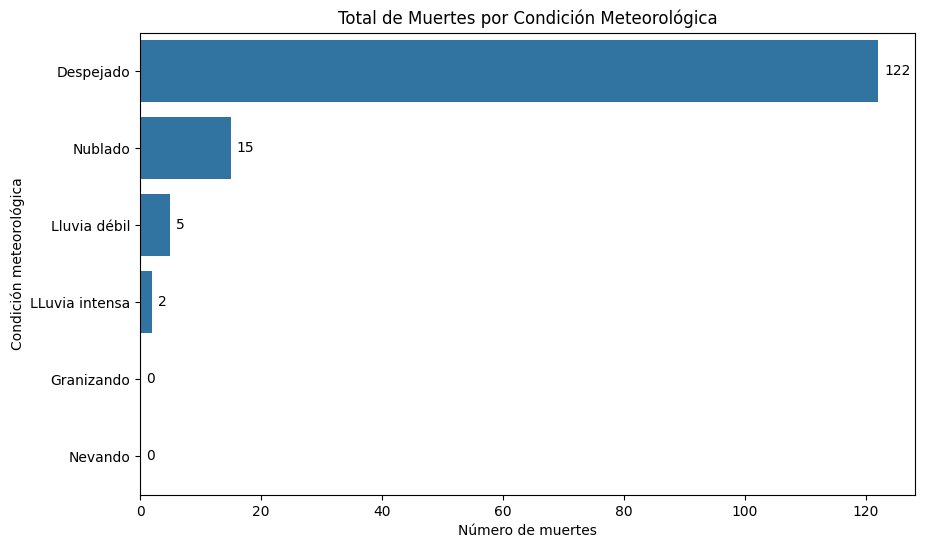

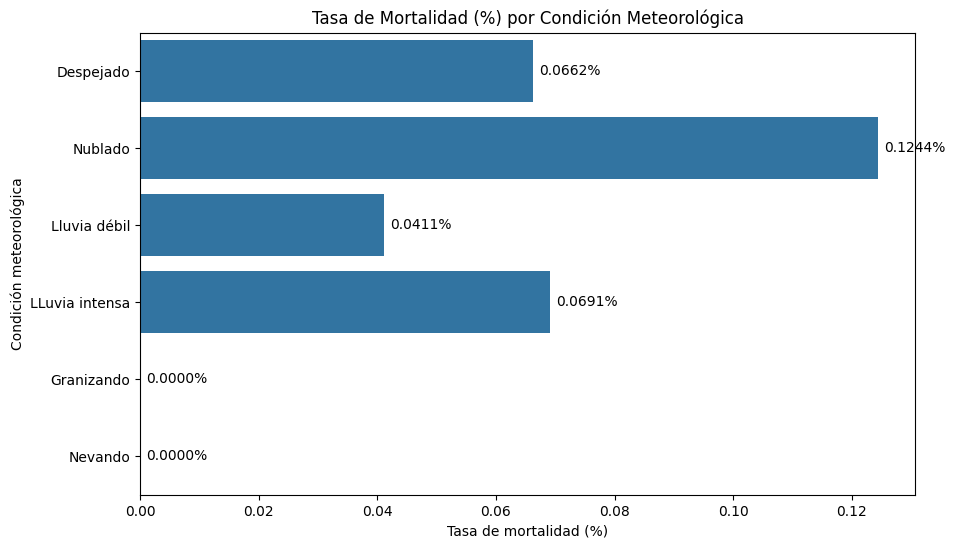

In [78]:
# 1. Total de muertes por condición meteorológica
muertes_por_clima = accidentes.groupby('condiciones_meteorológicas')['muertes'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=muertes_por_clima.values, y=muertes_por_clima.index)
plt.title('Total de Muertes por Condición Meteorológica')
plt.xlabel('Número de muertes')
plt.ylabel('Condición meteorológica')

for i, v in enumerate(muertes_por_clima.values):
    plt.text(v + 1, i, str(v), color='black', va='center')
plt.show()


# 2. Tasa de mortalidad (%) = (muertes / total accidentes) * 100

total_accidentes_clima = accidentes['condiciones_meteorológicas'].value_counts()
tasa_mortalidad_clima = (muertes_por_clima / total_accidentes_clima[muertes_por_clima.index]) * 100

plt.figure(figsize=(10,6))
sns.barplot(x=tasa_mortalidad_clima.values, y=tasa_mortalidad_clima.index)
plt.title('Tasa de Mortalidad (%) por Condición Meteorológica')
plt.xlabel('Tasa de mortalidad (%)')
plt.ylabel('Condición meteorológica')

for i, v in enumerate(tasa_mortalidad_clima.values):
    plt.text(v + 0.001, i, f"{v:.4f}%", color='black', va='center')

plt.show()